In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

columns = ['user_id','order_dt','order_products','order_amount']
df = pd.read_csv('E:/datas/CDNOW_master.txt',names=columns,sep='\s+')
print(df.head())
print(df.info()) #没有缺失数据

   user_id  order_dt  order_products  order_amount
0        1  19970101               1         11.77
1        2  19970112               1         12.00
2        2  19970112               5         77.00
3        3  19970102               2         20.76
4        3  19970330               2         20.76
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
user_id           69659 non-null int64
order_dt          69659 non-null int64
order_products    69659 non-null int64
order_amount      69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB
None


In [3]:
# order_dt是int类型，需要转化为datetime
df['order_dt'] = pd.to_datetime(df['order_dt'],format='%Y%m%d')
# 新增列月份
df['month'] = df.order_dt.values.astype('datetime64[M]')
print(df.head())
print(df.info())

   user_id   order_dt  order_products  order_amount      month
0        1 1997-01-01               1         11.77 1997-01-01
1        2 1997-01-12               1         12.00 1997-01-01
2        2 1997-01-12               5         77.00 1997-01-01
3        3 1997-01-02               2         20.76 1997-01-01
4        3 1997-03-30               2         20.76 1997-03-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
user_id           69659 non-null int64
order_dt          69659 non-null datetime64[ns]
order_products    69659 non-null int64
order_amount      69659 non-null float64
month             69659 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB
None


In [4]:
# 描述性统计
df.describe()

,user_id,order_products,order_amount
count,69659.000000,69659.000000,69659.000000
mean,11470.854592,2.410040,35.893648
std,6819.904848,2.333924,36.281942
min,1.000000,1.000000,0.000000
25%,5506.000000,1.000000,14.490000
50%,11410.000000,2.000000,25.980000
75%,17273.000000,3.000000,43.700000
max,23570.000000,99.000000,1286.010000


> 商品数均值为2.4，最大值为99，有一定干扰
金额均值为35，最大值为1286，有一定干扰

Text(0.5,1,'每月用户数变化趋势')

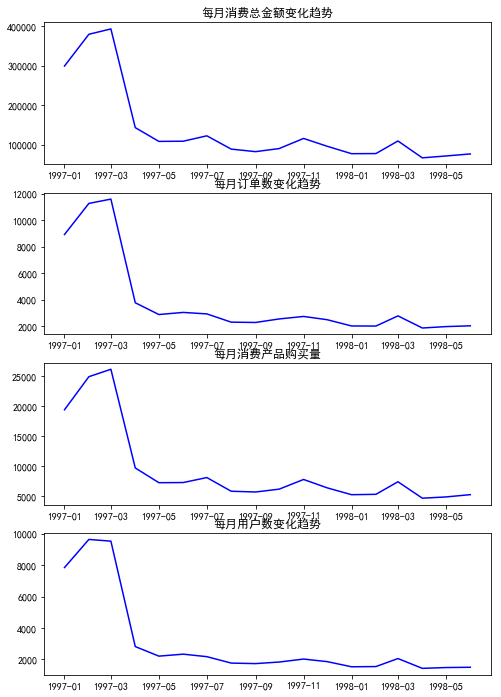

In [5]:
plt.rcParams['font.family']='SimHei'
# 按照年月分组
grouped_month = df.groupby('month')

fig = plt.figure(figsize = (8,12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)
# 按月金额数
ax1.plot(grouped_month.order_amount.sum(),c='blue')
ax1.set_title('每月消费总金额变化趋势')
# 按月的订单数
ax2.plot(grouped_month.user_id.count(),c='blue')
ax2.set_title('每月订单数变化趋势')
# 按月产品数
ax3.plot(grouped_month.order_products.sum(),c='blue')
ax3.set_title('每月消费产品购买量')
# 每月用户人数  这里需要去重，有些用户重复购买
ax4.plot(grouped_month.user_id.apply(lambda x:len(x.drop_duplicates())),c='blue')
ax4.set_title('每月用户数变化趋势')

### 透视表

In [6]:
df.pivot_table(index='month',
                values = ['order_products','order_amount','user_id'],
                aggfunc = {'order_products':'sum',
                           'order_amount':'sum',
                           'user_id':'count'})

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


### 用户消费金额和消费次数描述统计

In [7]:
grouped_user = df.groupby('user_id')
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


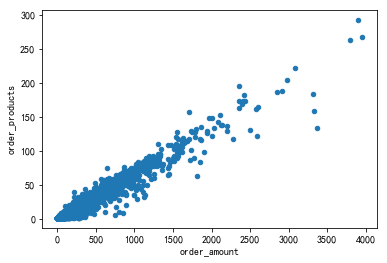

In [8]:
# 用户消费金额和消费次数散点图
# 设置排除一些极值的干扰进行观察
grouped_user.sum().query('order_amount < 4000').plot.scatter(x='order_amount',y='order_products')

### 用户消费金额的分布图（二八法则

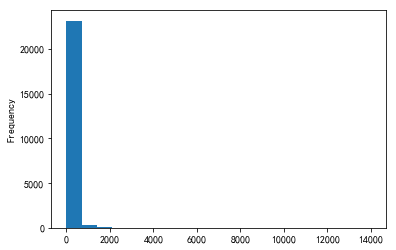

In [9]:
grouped_user.sum().order_amount.plot.hist(bins=20)

> 可见大部分消费并不高

### 用户消费次数分布图

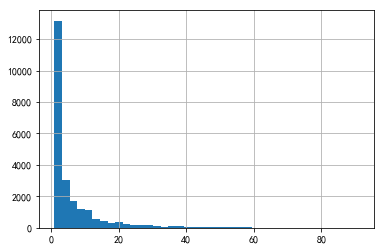

In [10]:
grouped_user.sum().query('order_products<92').order_products.hist(bins = 40)

### 用户累计消费金额占比

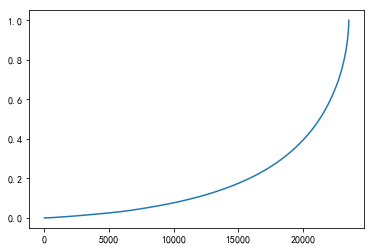

In [11]:
user_cumsum = grouped_user.sum().sort_values('order_amount').apply(lambda x: x.cumsum() / x.sum())
user_cumsum.reset_index().order_amount.plot()

> 1.一半客户仅仅贡献了15%销售额。2.前5000客户贡献了60%销售额.

### 用户消费行为分析

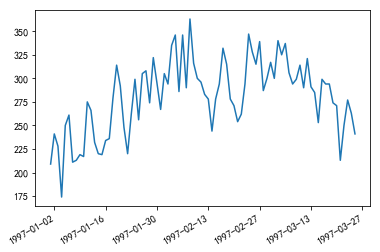

In [13]:
# 1.第一次购买时间分布
grouped_user.min().order_dt.value_counts().plot()

> 第一次购买时间主要集中在1-3月

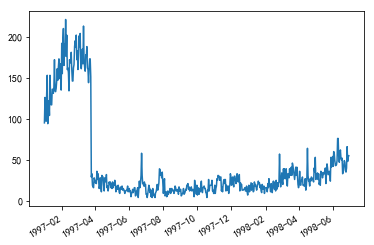

In [14]:
# 最后一次购买时间分布
grouped_user.max().order_dt.value_counts().plot()

> 最后一次购买时间分布比较广，但是还是集中在1-3月。说明很多人只购买了一次

#### 新老客户消费对比

In [16]:
user_life = grouped_user.order_dt.agg(['min','max'])
user_life.head()

,min,max
user_id,,
1,1997-01-01,1997-01-01
2,1997-01-12,1997-01-12
3,1997-01-02,1998-05-28
4,1997-01-01,1997-12-12
5,1997-01-01,1998-01-03


In [19]:
# 统计频次
(user_life['min']==user_life['max']).value_counts()

True     12054
False    11516
dtype: int64

([<matplotlib.patches.Wedge at 0x1dd83fbf9e8>,
 [Text(-1.64894,-0.059147,'只消费一次用户'), Text(1.79884,0.064524,'多次消费用户')],
 [Text(-0.899422,-0.032262,'51.1%'), Text(1.04933,0.037639,'48.9%')])

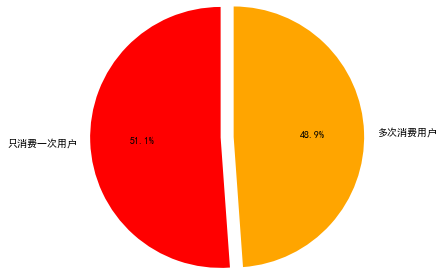

In [20]:
# 绘制成图
rate = (user_life['min'] == user_life['max']).value_counts()
labels = ['只消费一次用户','多次消费用户']
plt.axis('equal') # 保证长宽相等
plt.pie(rate,explode=(0,0.15),labels=labels,autopct='%2.1f%%',startangle=90,colors=['r','orange'],radius=1.5)

> 可见大约一半用户只消费了一次

#### RFM用户分层

In [24]:
rfm = df.pivot_table(index='user_id',
                     values=['order_products','order_amount','order_dt'],
                     aggfunc={
                         'order_dt':'max',
                         'order_amount':'sum',
                         'order_products':'sum'})
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [26]:
# 最近一次消费时间间隔
rfm['order_dt'].max()-rfm['order_dt'].head()

user_id
1   545 days
2   534 days
3    33 days
4   200 days
5   178 days
Name: order_dt, dtype: timedelta64[ns]

In [29]:
# 消除单位，重新命名
rfm['R'] = (rfm['order_dt'].max()-rfm['order_dt']) / np.timedelta64(1,'D')
rfm.rename(columns = {'order_products':'F','order_amount':'M'},inplace=True)
rfm.head()

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,545.0
2,89.00,1997-01-12,6,534.0
3,156.46,1998-05-28,16,33.0
4,100.50,1997-12-12,7,200.0
5,385.61,1998-01-03,29,178.0


In [30]:
# 与均值进行对比
rfm[['R','F','M']].apply(lambda x:x-x.mean()).head()

,R,F,M
user_id,,,
1,177.778362,-6.122656,-94.310426
2,166.778362,-1.122656,-17.080426
3,-334.221638,8.877344,50.379574
4,-167.221638,-0.122656,-5.580426
5,-189.221638,21.877344,279.529574


In [37]:
def rfm_func(x):
    '''关于字典d的说明
    
    R=1表示最近一次购买比较远，F=1表示购买频率比较大，M=1表示购买金额比较高
    '''
    level = x.apply(lambda x:'1' if x>= 0 else '0')
    label = level.R + level.F + level.M
    d = {
        '111':'重要价值客户', 
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'
    }
    result = d[label]
    return result
# x - x.mean() （具体真实情况可以修改，不一定需要用均值）   切比雪夫也可以 > 200 极值人工处理掉
rfm['label'] = rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis=1)
rfm.head()

,M,order_dt,F,R,label
user_id,,,,,
1,11.77,1997-01-01,1,545.0,一般挽留客户
2,89.00,1997-01-12,6,534.0,一般挽留客户
3,156.46,1998-05-28,16,33.0,重要保持客户
4,100.50,1997-12-12,7,200.0,一般发展客户
5,385.61,1998-01-03,29,178.0,重要保持客户


In [38]:
rfm.groupby('label').sum()

,M,F,R
label,,,
一般价值客户,7181.28,650,36295.0
一般保持客户,19937.45,1712,29448.0
一般发展客户,196971.23,13977,591108.0
一般挽留客户,438291.81,29346,6951815.0
重要价值客户,167080.83,11121,358363.0
重要保持客户,1592039.62,107789,517267.0
重要发展客户,45785.01,2023,56636.0
重要挽留客户,33028.40,1263,114482.0


In [45]:
s = rfm.groupby('label').sum()
s.loc['重要保持客户','M']/(s['M'].sum())
# 重要保持客户购买金额占总销售额的63%

0.6367354588748496

In [46]:
rfm.groupby('label').count()

,M,order_dt,F,R
label,,,,
一般价值客户,77,77,77,77
一般保持客户,206,206,206,206
一般发展客户,3300,3300,3300,3300
一般挽留客户,14074,14074,14074,14074
重要价值客户,787,787,787,787
重要保持客户,4554,4554,4554,4554
重要发展客户,331,331,331,331
重要挽留客户,241,241,241,241


([<matplotlib.patches.Wedge at 0x1dd85606320>,
 [Text(3.46759,0.967387,'一般价值客户'),
  Text(3.42864,1.09747,'一般保持客户'),
  Text(2.56665,2.52435,'一般发展客户'),
  Text(-3.59572,0.175471,'一般挽留客户'),
  Text(1.27234,-3.36766,'重要价值客户'),
  Text(3.1633,-1.71858,'重要保持客户'),
  Text(3.55771,0.550206,'重要发展客户'),
  Text(3.50546,0.819587,'重要挽留客户')],
 [Text(2.60069,0.72554,'0.3%'),
  Text(2.57148,0.8231,'0.9%'),
  Text(1.92498,1.89326,'14.0%'),
  Text(-2.69679,0.131603,'59.7%'),
  Text(0.954253,-2.52575,'3.3%'),
  Text(2.37248,-1.28893,'19.3%'),
  Text(2.66828,0.412655,'1.4%'),
  Text(2.6291,0.61469,'1.0%')])

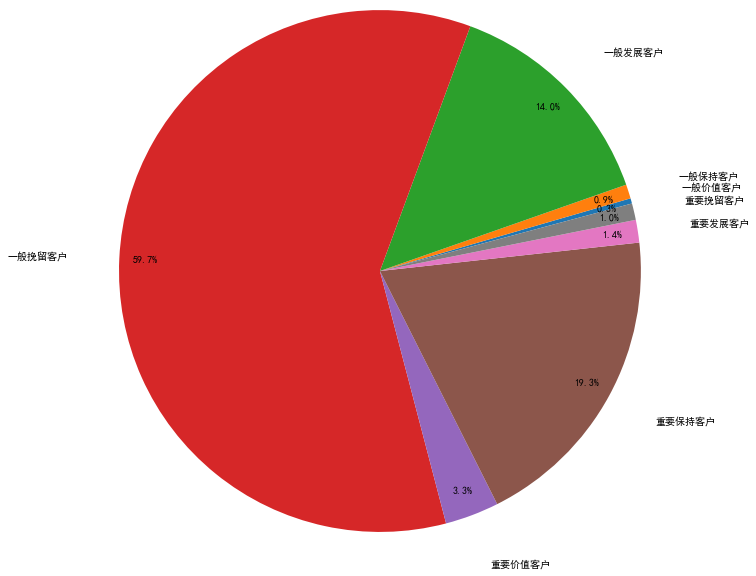

In [47]:
# 各类类型用户占比
use_c = rfm.groupby('label').count()
plt.axis('equal')
labels = ['一般价值客户','一般保持客户','一般发展客户','一般挽留客户','重要价值客户','重要保持客户','重要发展客户','重要挽留客户']
plt.pie(use_c['M'],
       autopct='%3.1f%%',
        labels = labels,
        pctdistance=0.9,
       labeldistance = 1.2,
       radius=3,
       startangle = 15)

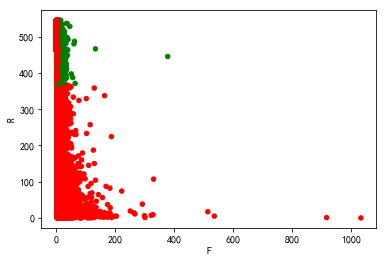

In [48]:
# 对应标签，使用不同颜色表示
# 绿色为重要价值客户，红色为非重要价值用户
rfm.loc[rfm.label == '重要价值客户','color'] = 'g'
rfm.loc[~(rfm.label == '重要价值客户'),'color'] = 'r'
rfm.plot.scatter('F','R',c=rfm.color)

In [50]:
pivoted_counts = df.pivot_table(index = 'user_id',
                                  columns = 'month',
                                  values = 'order_dt',
                                  aggfunc = 'count').fillna(0)
# pivoted_counts.head()
pivoted_counts.head()
# 按月份进行对比，1月份哪些是购买的，再去对比二月份哪些是购买的

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
#消费过的为1 ，没消费过的为0
data_purchase = pivoted_counts.applymap(lambda x: 1 if x > 0 else 0)
data_purchase.tail()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# 划分活跃
def active_status(data):
    status = []
    for i in range(18):
        
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg':
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')                  
        #若本月消费
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status, index = pivoted_counts.columns)

#### 若本月没有消费
- 若之前是未注册，则依旧未注册
- 若之前有消费，则为流失/不活跃
- 其他情况，为未注册

#### 若本月有消费
- 若是第一次消费，则为新用户
- 如果之前有过消费，则上个月为不活跃，则为回流
- 如果上个月为未注册，则为新用户
- 除此之外，为活跃

In [55]:
purchase_stats = data_purchase.apply(active_status,axis=1,result_type ='expand')
purchase_stats.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [56]:
purchase_status_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x : pd.value_counts(x))
purchase_status_ct
# 未注册不希望参与处理  设置为空值

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


> 只有前三个月有新用户加入，往后没有新用户后，活跃用户也逐渐的在流失

In [58]:
purchase_status_ct.fillna(0).T.apply(lambda x:x/x.sum(),axis=1)

,active,new,return,unactive
month,,,,
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220


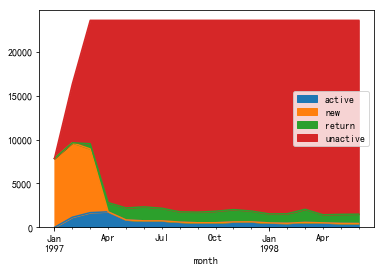

In [59]:

purchase_status_ct.fillna(0).T.plot.area()

#### 用户购买周期

In [63]:
df.order_dt.head(10)

0   1997-01-01
1   1997-01-12
2   1997-01-12
3   1997-01-02
4   1997-03-30
5   1997-04-02
6   1997-11-15
7   1997-11-25
8   1998-05-28
9   1997-01-01
Name: order_dt, dtype: datetime64[ns]

In [64]:
# 错位
df.order_dt.shift().head(10)

0          NaT
1   1997-01-01
2   1997-01-12
3   1997-01-12
4   1997-01-02
5   1997-03-30
6   1997-04-02
7   1997-11-15
8   1997-11-25
9   1998-05-28
Name: order_dt, dtype: datetime64[ns]

In [66]:
# 订单时间间隔
order_diff = grouped_user.apply(lambda x:x.order_dt - x.order_dt.shift())
order_diff.head(20)

user_id    
1        0         NaT
2        1         NaT
         2      0 days
3        3         NaT
         4     87 days
         5      3 days
         6    227 days
         7     10 days
         8    184 days
4        9         NaT
         10    17 days
         11   196 days
         12   132 days
5        13        NaT
         14    13 days
         15    21 days
         16    66 days
         17    50 days
         18    16 days
         19    36 days
Name: order_dt, dtype: timedelta64[ns]

In [67]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

> 用户订单平均时间间隔为68天，中位值为31天

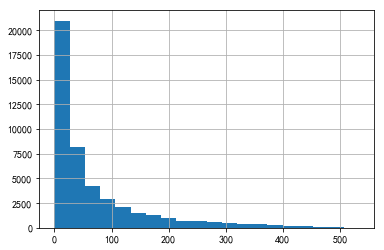

In [68]:
(order_diff / np.timedelta64(1,'D')).hist(bins=20)

In [69]:
# 整体生命周期
(user_life['max'] - user_life['min']).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

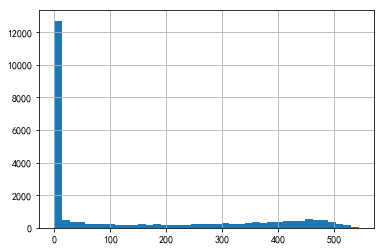

In [70]:
((user_life['max'] - user_life['min']) / np.timedelta64(1,'D')).hist(bins = 40)

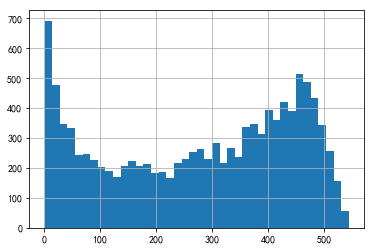

In [75]:
# 购买一次以上用户的生命周期
u_l = ((user_life['max'] - user_life['min']).reset_index()[0] / np.timedelta64(1,'D'))
u_l[u_l > 0].hist(bins=40)

> 生命周期在10-20天的用户还是比较多的

#### 复购率与回购率
复购率
- 自然月内，购买多次的用户占比

回购率
- 曾今购买过的用户在某一时期内的再次购买占比

In [76]:
pivoted_counts.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# 复购率
# 购买1次以上的赋值为1，购买1次的赋值为0，没有购买的赋值为空
purchase_r = pivoted_counts.applymap(lambda x: 1 if x > 1 else np.NaN if x == 0 else 0)
purchase_r.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


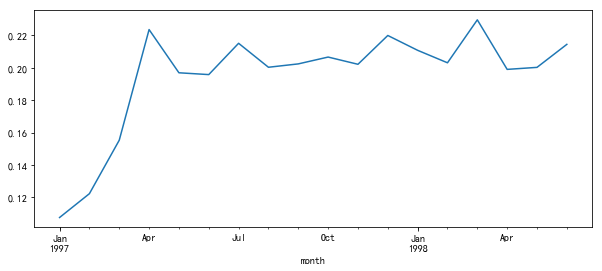

In [78]:
(purchase_r.sum() / purchase_r.count()).plot(figsize = (10,4))

> 复购率稳定在20%左右

In [79]:
data_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [80]:
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] == 1: # 本月进行过消费
            if data[i+1] == 1: # 下一月是否进行消费
                status.append(1) #消费为1 回购了
            if data[i+1] == 0:
                status.append(0) # 未消费则为0 没有回购
        else:
            status.append(np.NaN) # 之前没消费则不计
    status.append(np.NaN) # 最后一个月没有判断需要补上
    return pd.Series(status,data_purchase.columns)
purchase_b = data_purchase.apply(purchase_back, axis =1)
purchase_b.head(5)

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


- 0 表示上个月购买了，下个月没有进行消费，则是没有回购 ，
- 1代表当月消费过次月依旧消费，表示回购了
- NAN表示当月没有消费（不进行计算

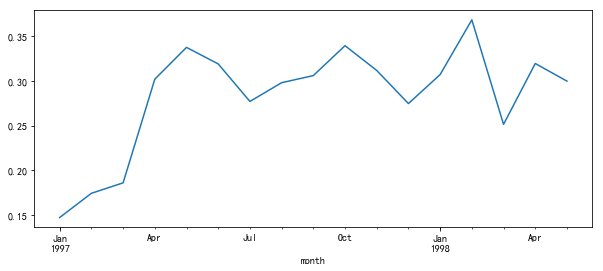

In [81]:
(purchase_b.sum() / purchase_b.count()).plot(figsize = (10, 4))